CODE BLOCK: 1

In [1]:
import torch
import torch.nn as nn
# import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

CODE BLOCK: 2

In [2]:
# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

CUDA Available? True


CODE BLOCK: 3

In [3]:
# Train data transformations
train_transforms = transforms.Compose([
    transforms.RandomRotation((-15., 15.), fill=1),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
    ])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    ])

CODE BLOCK: 4

In [4]:
from utils import get_mnist_data

train_data, test_data = get_mnist_data(train_transforms, test_transforms)

CODE BLOCK: 5

In [5]:
batch_size = 512

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 4, 'pin_memory': True}

test_loader = torch.utils.data.DataLoader(test_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


CODE BLOCK: 6

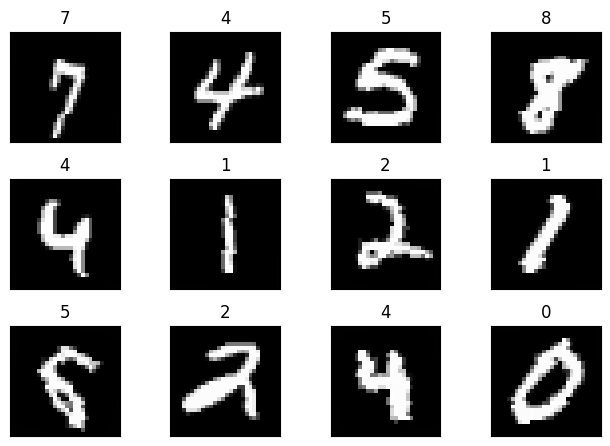

In [6]:
import matplotlib.pyplot as plt

batch_data, batch_label = next(iter(train_loader))

fig = plt.figure()

for i in range(12):
  plt.subplot(3,4,i+1)
  plt.tight_layout()
  plt.imshow(batch_data[i].squeeze(0), cmap='gray')
  plt.title(batch_label[i].item())
  plt.xticks([])
  plt.yticks([])

CODE BLOCK: 7

In [7]:
from model import model_3

CODE BLOCK: 8

In [8]:
# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []

test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}

CODE BLOCK: 9

In [9]:
from utils import train, test
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = model_3().to(device)
summary(model, input_size=(1, 28, 28))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 26, 26]             144
              ReLU-2           [-1, 16, 26, 26]               0
       BatchNorm2d-3           [-1, 16, 26, 26]              32
           Dropout-4           [-1, 16, 26, 26]               0
            Conv2d-5            [-1, 8, 24, 24]           1,152
              ReLU-6            [-1, 8, 24, 24]               0
       BatchNorm2d-7            [-1, 8, 24, 24]              16
           Dropout-8            [-1, 8, 24, 24]               0
            Conv2d-9            [-1, 8, 24, 24]              64
        MaxPool2d-10            [-1, 8, 12, 12]               0
           Conv2d-11           [-1, 16, 10, 10]           1,152
             ReLU-12           [-1, 16, 10, 10]               0
    

CODE BLOCK: 10

In [10]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if cuda else "cpu")
model = model_3().to(device)


optimizer = optim.SGD(model.parameters(), lr=0.09, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1, verbose=True)
num_epochs = 15

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  model, train_losses, train_acc = train(model, device, train_loader, optimizer, train_losses, train_acc)
  model, test_losses, test_acc = test(model, device, test_loader, test_losses, test_acc)
  scheduler.step()

Adjusting learning rate of group 0 to 9.0000e-02.
Epoch 1


Loss=0.08563391119241714 Batch_id=117 Accuracy=80.45: 100%|██████████| 118/118 [00:27<00:00,  4.34it/s]



Test set: Average loss: 0.1209, Accuracy: 9628/10000 (96.28%)

Adjusting learning rate of group 0 to 9.0000e-02.
Epoch 2


Loss=0.05393092706799507 Batch_id=117 Accuracy=96.19: 100%|██████████| 118/118 [00:21<00:00,  5.50it/s]



Test set: Average loss: 0.0585, Accuracy: 9830/10000 (98.30%)

Adjusting learning rate of group 0 to 9.0000e-02.
Epoch 3


Loss=0.11677619814872742 Batch_id=117 Accuracy=97.09: 100%|██████████| 118/118 [00:20<00:00,  5.83it/s]



Test set: Average loss: 0.0482, Accuracy: 9854/10000 (98.54%)

Adjusting learning rate of group 0 to 9.0000e-02.
Epoch 4


Loss=0.0275223758071661 Batch_id=117 Accuracy=97.65: 100%|██████████| 118/118 [00:24<00:00,  4.90it/s]



Test set: Average loss: 0.0434, Accuracy: 9870/10000 (98.70%)

Adjusting learning rate of group 0 to 9.0000e-02.
Epoch 5


Loss=0.050264228135347366 Batch_id=117 Accuracy=97.94: 100%|██████████| 118/118 [00:19<00:00,  6.19it/s]



Test set: Average loss: 0.0331, Accuracy: 9905/10000 (99.05%)

Adjusting learning rate of group 0 to 9.0000e-02.
Epoch 6


Loss=0.04323607683181763 Batch_id=117 Accuracy=98.11: 100%|██████████| 118/118 [00:18<00:00,  6.25it/s]



Test set: Average loss: 0.0320, Accuracy: 9892/10000 (98.92%)

Adjusting learning rate of group 0 to 9.0000e-02.
Epoch 7


Loss=0.017699092626571655 Batch_id=117 Accuracy=98.19: 100%|██████████| 118/118 [00:21<00:00,  5.47it/s]



Test set: Average loss: 0.0281, Accuracy: 9918/10000 (99.18%)

Adjusting learning rate of group 0 to 9.0000e-02.
Epoch 8


Loss=0.011962252669036388 Batch_id=117 Accuracy=98.27: 100%|██████████| 118/118 [00:20<00:00,  5.79it/s]



Test set: Average loss: 0.0296, Accuracy: 9911/10000 (99.11%)

Adjusting learning rate of group 0 to 9.0000e-02.
Epoch 9


Loss=0.040885962545871735 Batch_id=117 Accuracy=98.35: 100%|██████████| 118/118 [00:18<00:00,  6.26it/s]



Test set: Average loss: 0.0291, Accuracy: 9907/10000 (99.07%)

Adjusting learning rate of group 0 to 9.0000e-02.
Epoch 10


Loss=0.026973074302077293 Batch_id=117 Accuracy=98.41: 100%|██████████| 118/118 [00:18<00:00,  6.28it/s]



Test set: Average loss: 0.0250, Accuracy: 9923/10000 (99.23%)

Adjusting learning rate of group 0 to 9.0000e-03.
Epoch 11


Loss=0.017376277595758438 Batch_id=117 Accuracy=98.67: 100%|██████████| 118/118 [00:19<00:00,  5.97it/s]



Test set: Average loss: 0.0210, Accuracy: 9939/10000 (99.39%)

Adjusting learning rate of group 0 to 9.0000e-03.
Epoch 12


Loss=0.07187020033597946 Batch_id=117 Accuracy=98.79: 100%|██████████| 118/118 [00:18<00:00,  6.28it/s]



Test set: Average loss: 0.0200, Accuracy: 9940/10000 (99.40%)

Adjusting learning rate of group 0 to 9.0000e-03.
Epoch 13


Loss=0.09416729211807251 Batch_id=117 Accuracy=98.76: 100%|██████████| 118/118 [00:19<00:00,  6.21it/s]



Test set: Average loss: 0.0200, Accuracy: 9939/10000 (99.39%)

Adjusting learning rate of group 0 to 9.0000e-03.
Epoch 14


Loss=0.04691730812191963 Batch_id=117 Accuracy=98.89: 100%|██████████| 118/118 [00:20<00:00,  5.85it/s]



Test set: Average loss: 0.0196, Accuracy: 9945/10000 (99.45%)

Adjusting learning rate of group 0 to 9.0000e-03.
Epoch 15


Loss=0.03684362396597862 Batch_id=117 Accuracy=98.79: 100%|██████████| 118/118 [00:20<00:00,  5.81it/s]



Test set: Average loss: 0.0201, Accuracy: 9940/10000 (99.40%)

Adjusting learning rate of group 0 to 9.0000e-03.


CODE BLOCK: 11